## Assignment 1: Titanic Missing Values
### Martin Louzada

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re

In [5]:
# load data using PassengerId as index
df = pd.read_csv("train.csv", index_col="PassengerId")
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# dataframe size
df.shape

(891, 11)

The dataset contains 891 observations of 11 features

In [7]:
# explore dataset: features overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We can observe missing values for "Age", "Cabin" and "Embarked"

In [8]:
# count the number of missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There 177 missing values for "Age", 687 for "Cabin" and just 2 for "Embarked".

In [9]:
# explore dataset: initial statistics on numerical features
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# calculate number and percentage of survivors
print(df["Survived"].value_counts())
print("")
print(df["Survived"].value_counts() / df["Survived"].count() * 100)

0    549
1    342
Name: Survived, dtype: int64

0    61.616162
1    38.383838
Name: Survived, dtype: float64


Number of Survivor: 342
Percentage of Survivors: 38.38%

In [11]:
# calculate number percentage of men and women
print(df["Sex"].value_counts())
print("")
print(df["Sex"].value_counts() / df["Sex"].count() * 100)

male      577
female    314
Name: Sex, dtype: int64

male      64.758698
female    35.241302
Name: Sex, dtype: float64


Number/Percentage of Male: 577 / 64.75%

Number/Percentage of Female: 314 / 35.25%

In [12]:
# Compute the number and percentage of survivors that were men and women
print(df[df["Survived"] == 1]["Sex"].value_counts())
print("")
print(df[df["Survived"] == 1]["Sex"].value_counts() / df[df["Survived"] == 1]["Survived"].count())

female    233
male      109
Name: Sex, dtype: int64

female    0.681287
male      0.318713
Name: Sex, dtype: float64


233 out of 342 survivors were Female (68.13%)

109 out of 342 survivors were Male (31.87%)

In [13]:
# Compute the percentage of survivors by sex
df.groupby(["Sex", "Survived"]).size() / df.groupby("Sex").size() * 100

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
dtype: float64

74.2% of all female passengers survived while 18.9% of male passengers survived

In [14]:
# Compute the probability of being male/female and surviving/not surviving
df.groupby(["Sex", "Survived"]).size() / df["Survived"].count() * 100

Sex     Survived
female  0            9.090909
        1           26.150393
male    0           52.525253
        1           12.233446
dtype: float64

Considering a random passenger on the dataset:

  * Probability of being Female and Not Surviving: 9.09%

  * Probability of being Female and Surviving: 26.15%

  * Probability of being Male and Not Surviving: 52.52%

  * Probability of being Male and Surviving: 12.23%
  
For a given female passenger, the probability of survival was 74.2%, while for male it was 18.9%.


In [18]:
# Compute the probability of survival of all combinations of sex and class
df.groupby(["Sex", "Pclass", "Survived"]).size() / df["Survived"].count() * 100

Sex     Pclass  Survived
female  1       0            0.336700
                1           10.213244
        2       0            0.673401
                1            7.856341
        3       0            8.080808
                1            8.080808
male    1       0            8.641975
                1            5.050505
        2       0           10.213244
                1            1.907969
        3       0           33.670034
                1            5.274972
dtype: float64

Considering the combinations of "Sex" and "Class", Sex seems to be the stronger predictor of who survived, although there is a clear correlation between Class and the probability of survival.

The probability of survival for Female Passengers in the first class is 96.8%, second class is 92.1% and third class is 50%. On the other hand, probabilities are lower for male passengers in all classes: 36.9% for first, 15.7% for second and 13.5 for third.

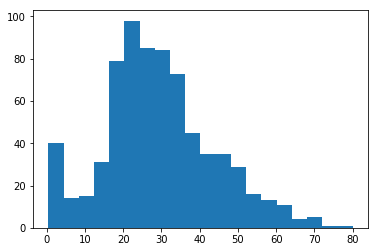

In [13]:
### impute the missing values in the Age column

# first let's see the distribution of the current values of Age
plt.hist(df["Age"].dropna(), 20)
plt.show()

There is a high concentration of lower ages (children), but besides that Age follows roughly a normal distribution.

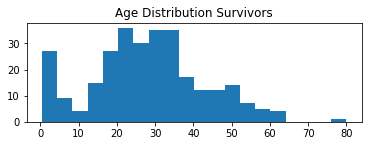

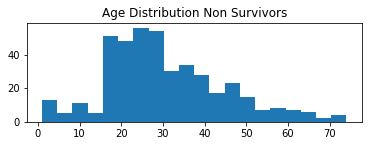

In [14]:
# Now let's see the distribution of age between survivors and non survivors
plt.subplot(2, 1, 1)
plt.hist(df[df["Survived"] == 1]["Age"].dropna(), 20)
plt.title("Age Distribution Survivors")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Survived"] == 0]["Age"].dropna(), 20)
plt.title("Age Distribution Non Survivors")
plt.show()

There is a higher concentration of youner ages among those that survided, but besided that the distributions are quite similar.

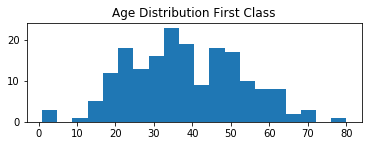

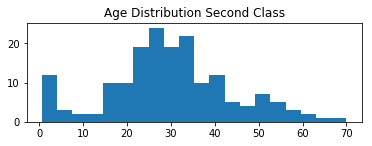

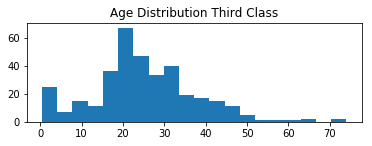

In [15]:
# Checking the distribution of Age by class
plt.subplot(2, 1, 1)
plt.hist(df[df["Pclass"] == 1]["Age"].dropna(), 20)
plt.title("Age Distribution First Class")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Pclass"] == 2]["Age"].dropna(), 20)
plt.title("Age Distribution Second Class")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Pclass"] == 3]["Age"].dropna(), 20)
plt.title("Age Distribution Third Class")
plt.show()

We can see that the Upper Classes had higher amount of older people (Age > 50)

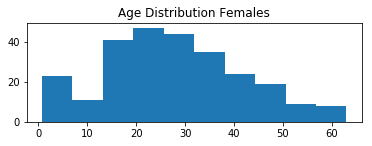

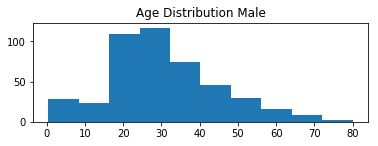

In [16]:
# Checking the distribution of Age by sex
plt.subplot(2, 1, 1)
plt.hist(df[df["Sex"] == "female"]["Age"].dropna(), 10)
plt.title("Age Distribution Females")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Sex"] == "male"]["Age"].dropna(), 10)
plt.title("Age Distribution Male")
plt.show()

Distribution of Ages by Sex is similar, although there are higher ages for Male (> 70)

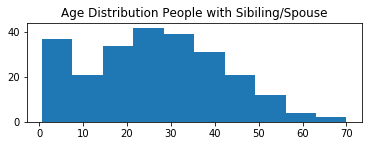

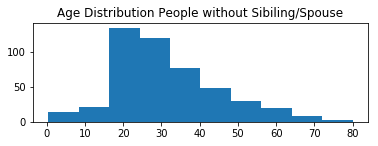

In [17]:
# Checking the distribution of Age for people who had sibilings and/or spouses on board
plt.subplot(2, 1, 1)
plt.hist(df[df["SibSp"] != 0]["Age"].dropna(), 10)
plt.title("Age Distribution People with Sibiling/Spouse")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["SibSp"] == 0]["Age"].dropna(), 10)
plt.title("Age Distribution People without Sibiling/Spouse")
plt.show()

We can see that there is a much higher concentration of younger ages for those people that had sibilings/spouses on board (probably more driven by the presence of brothers/sisters)

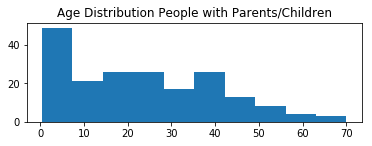

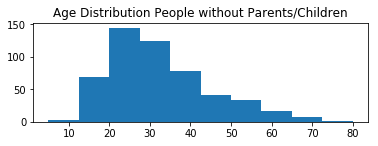

In [18]:
# Checking the distribution of Age for people who had parents and/or children on board
plt.subplot(2, 1, 1)
plt.hist(df[df["Parch"] != 0]["Age"].dropna(), 10)
plt.title("Age Distribution People with Parents/Children")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Parch"] == 0]["Age"].dropna(), 10)
plt.title("Age Distribution People without Parents/Children")
plt.show()

As expected, huge concentration of young ages among those that had Parents on board.

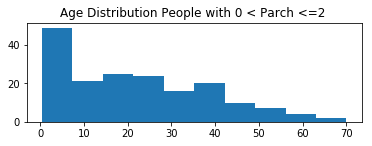

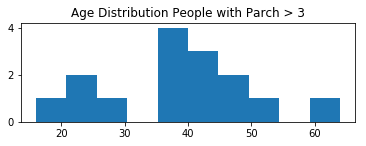

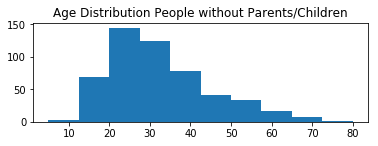

In [19]:
# Let's try with 0 < Parchar <= 2 to try to spot only children with their parents (risk of including parents with only one child)
plt.subplot(2, 1, 1)
plt.hist(df[(df["Parch"] > 0) & (df["Parch"] < 3)]["Age"].dropna(), 10)
plt.title("Age Distribution People with 0 < Parch <=2 ")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Parch"] > 2]["Age"].dropna(), 10)
plt.title("Age Distribution People with Parch > 3")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Parch"] == 0]["Age"].dropna(), 10)
plt.title("Age Distribution People without Parents/Children")
plt.show()

It seems like very feel instances in the dataframe had Parch > 3 so this division was not so informative.
However, as the next chunk shows, most missing values for age belong to those with Parch = 0:

In [20]:
print(df[(df["Parch"] > 0) & (df["Parch"] < 3)]["Age"].isnull().sum())
print(df[df["Parch"] > 2]["Age"].isnull().sum())
print(df[df["Parch"] == 0]["Age"].isnull().sum())

20
0
157


Given those results, the inputation of missing values for Age will be done according to the median values of all combinations of "Pclass", "Sibsp" and "Parch". The values to be inputed are printed in the following chunk:

In [21]:
# creating a dummy variable to indicate if has or no sibilings/spouse
df["SibSp_dummy"] = 0
for row in range(1, df["SibSp"].count() - 1):
    if df["SibSp"][row] > 0:
        df["SibSp_dummy"][row] = 1
    else:
        df["SibSp_dummy"][row] = 0

# creating a dummy variable to indicate if has or no parents/children
df["Parch_dummy"] = 0
for row in range(1, df["Parch"].count() - 1):
    if df["Parch"][row] > 0 & df["Parch"][row] < 3:
        df["Parch_dummy"][row] = 1
    else:
        df["Parch_dummy"][row] = 0

C:\Users\jalouzada\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jalouzada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\jalouzada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\jalouzada\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingW

In [22]:
# values to be imputed according to combinations
medians_to_input = pd.pivot_table(
    df, index=["Pclass", "SibSp_dummy", "Parch_dummy"], values="Age", aggfunc=np.mean
)
medians_to_input

Age
Pclass SibSp_dummy Parch_dummy           
1      0           0            41.005814
                   1            33.370370
       1           0            37.937500
                   1            34.516800
2      0           0            33.736559
                   1            21.458125
       1           0            31.050000
                   1            22.250000
3      0           0            28.235556
                   1            21.955000
       1           0            25.525641
                   1            15.664179

In [23]:
# to make it easier, let's concatenate this in a variable
df["age_input_ref"] = df["Pclass"].astype(str) + df["SibSp_dummy"].astype(str) + df["Parch_dummy"].astype(str)

In [24]:
# inputing missing values for age according to the value of "age_input_ref"
df["Age_input1"] = 0
for row in range(1, df["Pclass"].count() - 1):
    if np.isnan(df["Age"][row]):
        df["Age_input1"][row] = np.median(
            df[df["age_input_ref"] == df["age_input_ref"][row]]["Age"].dropna()
        )
    else:
        df["Age_input1"][row] = df["Age"][row]

C:\Users\jalouzada\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\jalouzada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# count again the number of missing values
df.isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
SibSp_dummy        0
Parch_dummy        0
age_input_ref      0
Age_input1         0
dtype: int64

"Age_input1" has zero missing values.

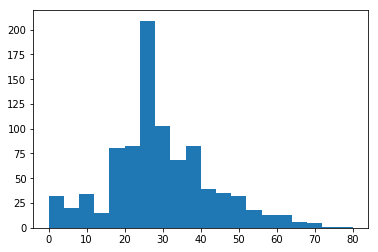

In [26]:
# now let's check again the distribution of the values of Age
plt.hist(df["Age_input1"].dropna(), 20)
plt.show()

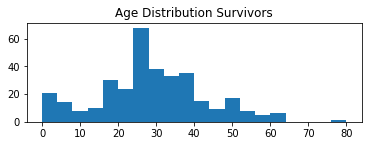

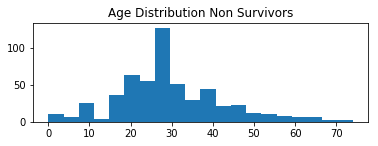

In [27]:
# Now let's see the distribution of age between survivors and non survivors
plt.subplot(2, 1, 1)
plt.hist(df[df["Survived"] == 1]["Age_input1"].dropna(), 20)
plt.title("Age Distribution Survivors")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Survived"] == 0]["Age_input1"].dropna(), 20)
plt.title("Age Distribution Non Survivors")
plt.show()

As we can see from the histograms, this method of imputation created a very high concentration of Ages around 25-30 yo, which doesn't seem to be very accurate.
So, we will now try to input ages according to each passenger's title (mr, miss, etc). This is similar to what was done in this kernel (https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic) in R, which I'll replicate in Python.

In [28]:
# extract the Title from the name
df["Title"] = ""
df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.", expand=False)

In [29]:
# check title distribution per sex
df.groupby(["Sex", "Title"]).size()

Sex     Title   
female  Countess      1
        Dr            1
        Lady          1
        Miss        182
        Mlle          2
        Mme           1
        Mrs         125
        Ms            1
male    Capt          1
        Col           2
        Don           1
        Dr            6
        Jonkheer      1
        Major         2
        Master       40
        Mr          517
        Rev           6
        Sir           1
dtype: int64

In [30]:
# group unusual titles
df["Title"] = df["Title"].replace(
    [
        "Lady",
        "Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Other",
)

# correct title variations
df["Title"] = df["Title"].replace(["Mlle", "Ms"], "Miss")
df["Title"] = df["Title"].replace("Mme", "Mrs")

In [31]:
# check again title distribution per sex
df.groupby(["Sex", "Title"]).size()

Sex     Title 
female  Miss      185
        Mrs       126
        Other       3
male    Master     40
        Mr        517
        Other      20
dtype: int64

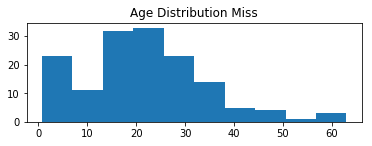

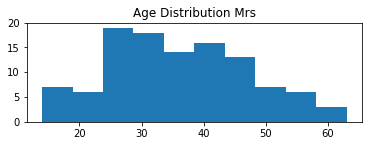

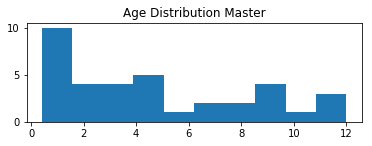

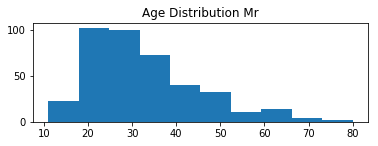

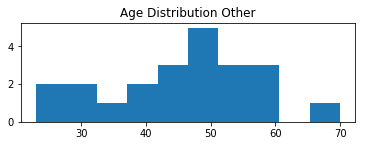

In [32]:
# now let's see the age distribution for the different titles
plt.subplot(2, 1, 1)
plt.hist(df[df["Title"] == "Miss"]["Age"].dropna(), 10)
plt.title("Age Distribution Miss")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Title"] == "Mrs"]["Age"].dropna(), 10)
plt.title("Age Distribution Mrs")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Title"] == "Master"]["Age"].dropna(), 10)
plt.title("Age Distribution Master")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Title"] == "Mr"]["Age"].dropna(), 10)
plt.title("Age Distribution Mr")
plt.show()

plt.subplot(2, 1, 1)
plt.hist(df[df["Title"] == "Other"]["Age"].dropna(), 10)
plt.title("Age Distribution Other")
plt.show()

It's clear thar Title is a good predictor of Age, at least as a distinction between adults and children.

In [33]:
# inputing missing values for age according to the Title
df["Age_input2"] = 0
for row in range(1, df["Pclass"].count() - 1):
    if np.isnan(df["Age"][row]):
        df["Age_input2"][row] = np.mean(
            df[df["Title"] == df["Title"][row]]["Age"].dropna()
        )
    else:
        df["Age_input2"][row] = df["Age"][row]

C:\Users\jalouzada\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\jalouzada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


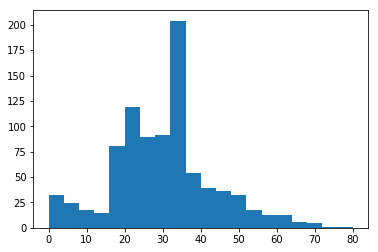

In [34]:
# now let's check again the distribution of the values of Age
plt.hist(df["Age_input2"].dropna(), 20)
plt.show()

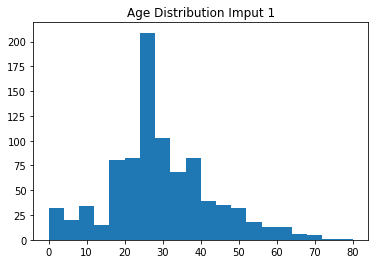

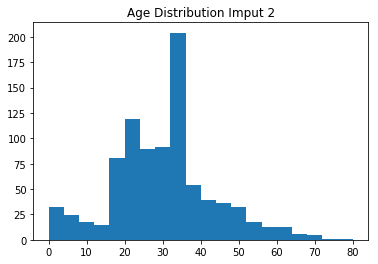

In [35]:
# let's check the difference between the two imputations
plt.hist(df["Age_input1"].dropna(), 20)
plt.title("Age Distribution Imput 1")
plt.show()

plt.hist(df["Age_input2"].dropna(), 20)
plt.title("Age Distribution Imput 2")
plt.show()

We can see that the second method provided slightly more variety and nuances in the imputed data, so this will be the selected result for the Age imputation

In [36]:
# set the definitive values of Age
df["Age"] = df["Age_input2"]

# drop auxiliary columns
df = df.drop(["Age_input1", "Age_input2", "age_input_ref"], axis=1)

# check for missing values
df.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
SibSp_dummy      0
Parch_dummy      0
Title            0
dtype: int64

We are now back with our original dataset without missing values for Age